# Economic data notebook

In [8]:
!pip install fredapi 

  Using cached fredapi-0.5.0-py3-none-any.whl (11 kB)



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time
from dotenv import load_dotenv # pip install python-dotenv. This takes environment variables from .env
from fredapi import Fred
import os

plt.style.use('fivethirtyeight')
#pd.set_option('max_columns', 200)

In [2]:

color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

# Load the FRED API KEY from the environment variables
def configure():
    load_dotenv()

configure()
FRED_KEY = os.getenv('FRED_KEY')

# Initialize with a FRED API key
fred_key = FRED_KEY


1. Create the Fred Object

In [3]:
fred = Fred(api_key=fred_key)

2. Search for economic data

In [4]:
sp_search = fred.search('S&P', order_by='popularity')

In [5]:
sp_search.head(20)

id realtime_start realtime_end   
series id                                                            
BAMLH0A0HYM2              BAMLH0A0HYM2     2023-07-02   2023-07-02  \
CSUSHPINSA                  CSUSHPINSA     2023-07-02   2023-07-02   
BAMLH0A0HYM2EY          BAMLH0A0HYM2EY     2023-07-02   2023-07-02   
SP500                            SP500     2023-07-02   2023-07-02   
MEHOINUSA672N            MEHOINUSA672N     2023-07-02   2023-07-02   
CSUSHPISA                    CSUSHPISA     2023-07-02   2023-07-02   
BAMLC0A0CM                  BAMLC0A0CM     2023-07-02   2023-07-02   
DJIA                              DJIA     2023-07-02   2023-07-02   
SPCS20RSA                    SPCS20RSA     2023-07-02   2023-07-02   
BAMLHE00EHYIOAS        BAMLHE00EHYIOAS     2023-07-02   2023-07-02   
SFXRSA                          SFXRSA     2023-07-02   2023-07-02   
BAMLHE00EHYIEY          BAMLHE00EHYIEY     2023-07-02   2023-07-02   
LXXRSA                          LXXRSA     2023-07-02   2023-07-02   
STLENI                          STLENI     2023-07-02   2023-07-02   
MEHOINUSA646N            MEHOINUSA646N     2023-07-02   2023-07-02   
SEXRNSA                        SEXRNSA     2023-07-02   2023-07-02   
BAMLC0A0CMEY              BAMLC0A0CMEY     2023-07-02   2023-07-02   
BAMLHYH0A0HYM2TRIV  BAMLHYH0A0HYM2TRIV     2023-07-02   2023-07-02   
SDXRSA                          SDXRSA     2023-07-02   2023-07-02   
NYXRSA                          NYXRSA     2023-07-02   2023-07-02   

                                                                title   
series id                                                               
BAMLH0A0HYM2        ICE BofA US High Yield Index Option-Adjusted S...  \
CSUSHPINSA            S&P/Case-Shiller U.S. National Home Price Index   
BAMLH0A0HYM2EY           ICE BofA US High Yield Index Effective Yield   
SP500                                                         S&P 500   
MEHOINUSA672N       Real Median Household Income in the United States   
CSUSHPISA             S&P/Case-Shiller U.S. National Home Price Index   
BAMLC0A0CM          ICE BofA US Corporate Index Option-Adjusted Sp...   
DJIA                                     Dow Jones Industrial Average   
SPCS20RSA           S&P/Case-Shiller 20-City Composite Home Price ...   
BAMLHE00EHYIOAS     ICE BofA Euro High Yield Index Option-Adjusted...   
SFXRSA              S&P/Case-Shiller CA-San Francisco Home Price I...   
BAMLHE00EHYIEY         ICE BofA Euro High Yield Index Effective Yield   
LXXRSA               S&P/Case-Shiller CA-Los Angeles Home Price Index   
STLENI              St. Louis Fed Economic News Index: Real GDP No...   
MEHOINUSA646N            Median Household Income in the United States   
SEXRNSA                  S&P/Case-Shiller WA-Seattle Home Price Index   
BAMLC0A0CMEY              ICE BofA US Corporate Index Effective Yield   
BAMLHYH0A0HYM2TRIV  ICE BofA US High Yield Index Total Return Inde...   
SDXRSA                 S&P/Case-Shiller CA-San Diego Home Price Index   
NYXRSA                  S&P/Case-Shiller NY-New York Home Price Index   

                   observation_start observation_end     frequency   
series id                                                            
BAMLH0A0HYM2              1996-12-31      2023-06-29  Daily, Close  \
CSUSHPINSA                1987-01-01      2023-04-01       Monthly   
BAMLH0A0HYM2EY            1996-12-31      2023-06-29  Daily, Close   
SP500                     2013-07-01      2023-06-30  Daily, Close   
MEHOINUSA672N             1984-01-01      2021-01-01        Annual   
CSUSHPISA                 1987-01-01      2023-04-01       Monthly   
BAMLC0A0CM                1996-12-31      2023-06-29  Daily, Close   
DJIA                      2013-07-01      2023-06-30  Daily, Close   
SPCS20RSA                 2000-01-01      2023-04-01       Monthly   
BAMLHE00EHYIOAS           1997-12-31      2023-06-29  Daily, Close   
SFXRSA                    1987-01-01      2023-0

3. Pull raw data and plot

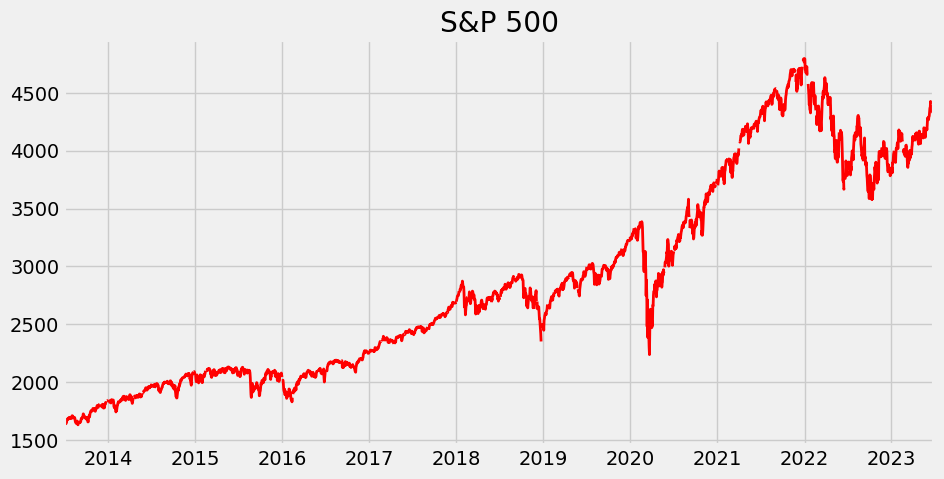

In [6]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2, color="red")
plt.show()

4. Pull and join multiple Data Series

In [7]:
fred.search('unemployment',order_by='popularity').head(5)

id realtime_start realtime_end   
series id                                                  
CPIAUCSL            CPIAUCSL     2023-07-02   2023-07-02  \
UNRATE                UNRATE     2023-07-02   2023-07-02   
ICSA                    ICSA     2023-07-02   2023-07-02   
PAYEMS                PAYEMS     2023-07-02   2023-07-02   
CES0500000003  CES0500000003     2023-07-02   2023-07-02   

                                                           title   
series id                                                          
CPIAUCSL       Consumer Price Index for All Urban Consumers: ...  \
UNRATE                                         Unemployment Rate   
ICSA                                              Initial Claims   
PAYEMS                              All Employees, Total Nonfarm   
CES0500000003  Average Hourly Earnings of All Employees, Tota...   

              observation_start observation_end                frequency   
series id                                                                  
CPIAUCSL             1947-01-01      2023-05-01                  Monthly  \
UNRATE               1948-01-01      2023-05-01                  Monthly   
ICSA                 1967-01-07      2023-06-24  Weekly, Ending Saturday   
PAYEMS               1939-01-01      2023-05-01                  Monthly   
CES0500000003        2006-03-01      2023-05-01                  Monthly   

              frequency_short                 units          units_short   
series id                                                                  
CPIAUCSL                    M   Index 1982-1984=100  Index 1982-1984=100  \
UNRATE                      M               Percent                    %   
ICSA                        W                Number               Number   
PAYEMS                      M  Thousands of Persons    Thous. of Persons   
CES0500000003               M      Dollars per Hour           $ per Hour   

               seasonal_adjustment seasonal_adjustment_short   
series id                                                      
CPIAUCSL       Seasonally Adjusted                        SA  \
UNRATE         Seasonally Adjusted                        SA   
ICSA           Seasonally Adjusted                        SA   
PAYEMS         Seasonally Adjusted                        SA   
CES0500000003  Seasonally Adjusted                        SA   

                            last_updated popularity   
series id                                             
CPIAUCSL       2023-06-13 07:44:03-05:00         93  \
UNRATE         2023-06-02 07:46:02-05:00         93   
ICSA           2023-06-29 07:33:01-05:00         84   
PAYEMS         2023-06-02 07:47:01-05:00         82   
CES0500000003  2023-06-02 07:47:01-05:00         78   

                                                           notes  
series id                                                         
CPIAUCSL       The Consumer Price Index for All Urban Consume...  
UNRATE         The unemployment rate represents the number of...  
ICSA           An initial claim is a claim filed by an unempl...  
PAYEMS         All Employees: Total Nonfarm, commonly known a...  
CES0500000003  The series comes from the 'Current Employment ...

In [8]:
unrate = fred.get_series('UNRATE')

In [31]:
#unrate.plot(color='red')

In [9]:
unemp_df = fred.search('unemployment state', filter =('frequency','Monthly'))
#unemp_df.head(5)
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]
unemp_df.shape
unemp_df

id realtime_start realtime_end   
series id                                                        
UNRATE                      UNRATE     2023-07-02   2023-07-02  \
LNS14000006            LNS14000006     2023-07-02   2023-07-02   
CAUR                          CAUR     2023-07-02   2023-07-02   
M0892AUSM156SNBR  M0892AUSM156SNBR     2023-07-02   2023-07-02   
M0892BUSM156SNBR  M0892BUSM156SNBR     2023-07-02   2023-07-02   
...                            ...            ...          ...   
LRUN24TTUSM156S    LRUN24TTUSM156S     2023-07-02   2023-07-02   
LNS14000089            LNS14000089     2023-07-02   2023-07-02   
LNS14000026            LNS14000026     2023-07-02   2023-07-02   
LNS14200000            LNS14200000     2023-07-02   2023-07-02   
LNS14000029            LNS14000029     2023-07-02   2023-07-02   

                                                              title   
series id                                                             
UNRATE                                            Unemployment Rate  \
LNS14000006           Unemployment Rate - Black or African American   
CAUR                                Unemployment Rate in California   
M0892AUSM156SNBR                Unemployment Rate for United States   
M0892BUSM156SNBR                Unemployment Rate for United States   
...                                                             ...   
LRUN24TTUSM156S   Unemployment Rate: Aged 15-24: All Persons for...   
LNS14000089                          Unemployment Rate - 25-34 Yrs.   
LNS14000026               Unemployment Rate - 20 Yrs. & over, Women   
LNS14200000                     Unemployment Rate Part-Time Workers   
LNS14000029         Unemployment Rate - 20 Yrs. & over, White Women   

                 observation_start observation_end frequency frequency_short   
series id                                                                      
UNRATE                  1948-01-01      2023-05-01   Monthly               M  \
LNS14000006             1972-01-01      2023-05-01   Monthly               M   
CAUR                    1976-01-01      2023-05-01   Monthly               M   
M0892AUSM156SNBR        1929-04-01      1942-06-01   Monthly               M   
M0892BUSM156SNBR        1940-01-01      1946-12-01   Monthly               M   
...                            ...             ...       ...             ...   
LRUN24TTUSM156S         1960-01-01      2023-05-01   Monthly               M   
LNS14000089             1948-01-01      2023-05-01   Monthly               M   
LNS14000026             1948-01-01      2023-05-01   Monthly               M   
LNS14200000             1968-01-01      2023-05-01   Monthly               M   
LNS14000029             1954-01-01      2023-05-01   Monthly               M   

                    units units_short  seasonal_adjustment   
series id                                                    
UNRATE            Percent           %  Seasonally Adjusted  \
LNS14000006       Percent           %  Seasonally Adjusted   
CAUR              Percent           %  Seasonally Adjusted   
M0892AUSM156SNBR  Percent           %  Seasonally Adjusted   
M0892BUSM156SNBR  Percent           %  Seasonally Adjusted   
...                   ...         ...                  ...   
LRUN24TTUSM156S   Percent           %  Seasonally Adjusted   
LNS14000089       Percent           %  Seasonally Adjusted   
LNS14000026       Percent           %  Seasonally Adjusted   
LNS14200000       Percent           %  Seasonally Adjusted   
LNS14000029       Percent           %  Seasonally Adjusted   

                 seasonal_adjustment_short               last_updated   
series id                                                               
UNRATE                                  SA  2023-06-02 07:46:02-05:00  \
LNS14000006                             SA  2023-06-02 07:46:06-05:00   
CAUR                                    SA  2023-06-20 14:30:02-05:00   
M0892AUSM156SNBR                    

In [10]:
all_results = []
for stateid in unemp_df.index:
    if len(stateid) == 4:
        results = fred.get_series(stateid)
        results = results.to_frame(name=stateid)              
        all_results.append(results) 

unemp_results = pd.concat(all_results, axis=1)       

In [11]:
unemp_states = unemp_results.dropna()
unemp_states
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in', '').to_dict()
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]

#print(all_results)

In [12]:
unemp_states

California   Florida   Texas   New York   Ohio   Michigan   
1976-01-01          9.2       9.7     5.8       10.3    8.1        9.9  \
1976-02-01          9.2       9.7     5.8       10.3    8.1        9.9   
1976-03-01          9.1       9.6     5.9       10.2    8.1        9.9   
1976-04-01          9.1       9.5     5.9       10.2    8.0        9.8   
1976-05-01          9.0       9.3     5.9       10.1    7.8        9.6   
...                 ...       ...     ...        ...    ...        ...   
2023-01-01          4.2       2.6     3.9        4.2    4.0        4.3   
2023-02-01          4.4       2.6     4.0        4.2    3.9        4.3   
2023-03-01          4.4       2.6     4.0        4.1    3.8        4.1   
2023-04-01          4.5       2.6     4.0        4.0    3.7        3.8   
2023-05-01          4.5       2.6     4.1        3.9    3.6        3.7   

             North Carolina   Minnesota   Pennsylvania   New Jersey  ...   
1976-01-01              6.4         6.0            8.0         10.3  ...  \
1976-02-01              6.4         6.0            8.1         10.3  ...   
1976-03-01              6.4         5.9            8.1         10.3  ...   
1976-04-01              6.3         5.8            8.1         10.3  ...   
1976-05-01              6.1         5.7            8.1         10.3  ...   
...                     ...         ...            ...          ...  ...   
2023-01-01              3.8         2.9            4.3          3.4  ...   
2023-02-01              3.6         3.0            4.4          3.5  ...   
2023-03-01              3.5         2.8            4.2          3.5  ...   
2023-04-01              3.4         2.8            4.1          3.5  ...   
2023-05-01              3.4         2.9            4.0          3.6  ...   

             Puerto Rico   Montana   Delaware   North Dakota   Maine   
1976-01-01          19.6       5.8        8.0            3.4     8.7  \
1976-02-01          19.5       5.8        8.0            3.4     8.7   
1976-03-01          19.3       5.8        8.0            3.4     8.6   
1976-04-01          19.0       5.8        8.1            3.5     8.6   
1976-05-01          18.9       5.8        8.3            3.6     8.5   
...                  ...       ...        ...            ...     ...   
2023-01-01           6.0       2.5        4.6            2.1     2.9   
2023-02-01           6.0       2.4        4.6            2.1     2.8   
2023-03-01           6.0       2.3        4.4            2.1     2.6   
2023-04-01           6.0       2.3        4.3            2.1     2.4   
2023-05-01           6.1       2.3        4.2            2.1     2.4   

             Wyoming   Rhode Island   South Dakota   Idaho   Vermont  
1976-01-01       4.1            7.8            3.3     5.6       8.6  
1976-02-01       4.1            7.8            3.3     5.6       8.6  
1976-03-01       4.1            7.7            3.2     5.6       8.6  
1976-04-01       4.0            7.7            3.1     5.6       8.6  
1976-05-01       3.9            7.7            3.1     5.6       8.5  
...              ...            ...            ...     ...       ...  
2023-01-01       3.9            3.1            2.1     2.7       2.9  
2023-02-01       3.8            3.1            2.1     2.6       2.8  
2023-03-01       3.7            3.1            1.9     2.6       2.7  
2023-04-01       3.5            3.0            1.9     2.6       2.4  
2023-05-01       3.3            3.0            1.9     2.6       2.1  

[567 rows x 52 columns]

In [13]:
px.line(unemp_states)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable= California<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': ' California',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': ' California',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2023, 3, 1, 0, 0),
                          datetime.datetime(2023, 4, 1, 0, 0),
                          datetime.datetime(2023, 5, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([9.2, 9.2, 9.1, ..., 4.4, 4.5, 4.5]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable= Florida<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': ' Florida',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': ' Florida',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2023, 3, 1, 0, 0),
                          datetime.datetime(2023, 4, 1, 0, 0),
                          datetime.datetime(2023, 5, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([9.7, 9.7, 9.6, ..., 2.6, 2.6, 2.6]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable= Texas<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': ' Texas',
              'line': {'color': '#00cc96', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': ' Texas',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2023, 3, 1, 0, 0),
                          datetime.datetime(2023, 4, 1, 0, 0),
                          datetime.datetime(2023, 5, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([5.8, 5.8, 5.9, ..., 4. , 4. , 4.1]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable= New York<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': ' New York',
              'line': {'color': '#ab63fa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': ' New York',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2023, 3, 1, 0, 0),
                          datetime.datetime(2023, 4, 1, 0, 0),
                          datetime.datetime(2023, 5, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([10.3, 10.3, 10.2, ...,  4.1,  4. ,  3.9]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable= Ohio<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': ' Ohio',
              'line': {'color': '#FFA15A', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': ' Ohio',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([d

In [14]:
ax = unemp_states.loc[unemp_states.index == '2020-05-01'].T 
ax['State'] = ax.index
# Change value of a cell from the District of Columbia to DC
ax.at[' the District of Columbia','State']='DC'
ax.columns = ['Unemployment rate', 'State']
ax
x = ax['Unemployment rate']
y = ax['State']
x, y

( California                  15.7
  Florida                     14.1
  Texas                       11.6
  New York                    16.6
  Ohio                        12.7
  Michigan                    19.1
  North Carolina              11.6
  Minnesota                   11.1
  Pennsylvania                12.9
  New Jersey                  15.3
  Alabama                     10.4
  Georgia                      9.7
  New Mexico                   9.3
  Tennessee                   12.1
  Massachusetts               15.5
  Illinois                    14.7
  Kentucky                    12.8
  Colorado                    11.6
  Wisconsin                   10.5
  South Carolina               9.2
  Oregon                      11.8
  Washington                  13.2
  Arkansas                     8.9
  Louisiana                   12.2
  Virginia                    10.0
  Utah                         7.7
  Arizona                     11.2
  West Virginia               12.4
  Missouri          

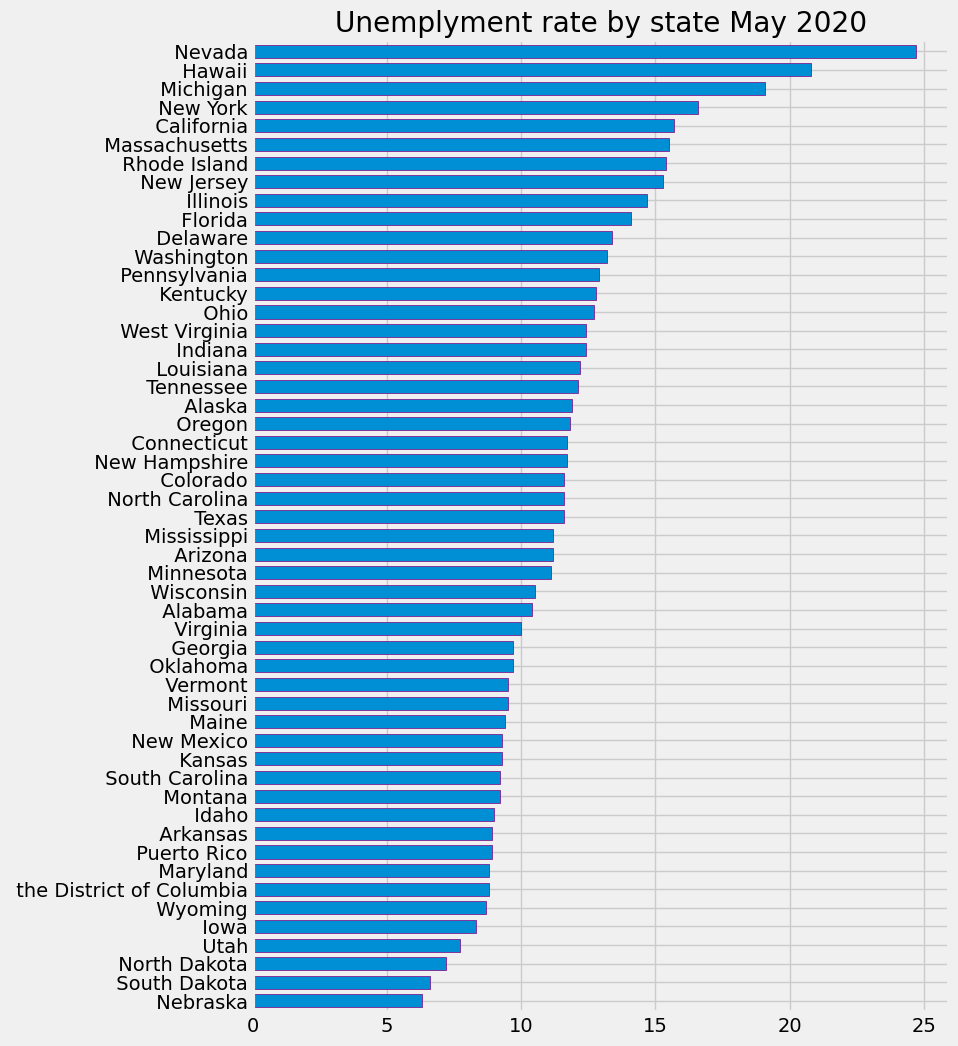

In [15]:
ax = unemp_states.loc[unemp_states.index == '2020-05-01'].T  \
.sort_values('2020-05-01')  \
.plot(kind='barh',figsize=(8,12), width = 0.7, edgecolor = 'purple', \
      title='Unemplyment rate by state May 2020')
ax.legend().remove()
plt.show()



# Pull participation rate

In [34]:
part_df = fred.search('participation rate state', filter =('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for', '').to_dict()
part_df.shape
part_df.index
#part_df.tail(50)

Index(['CIVPART', 'LNS11300060', 'LNS11300002', 'LNS11300001', 'LNS11324230',
       'LNS11300012', 'LNS11300006', 'LRAC25MAUSM156S', 'LNS11300036',
       'LBSSA06',
       ...
       'LRIN25TTUSM156S', 'LRINTTMAUSM156S', 'LRACTTMAUSM156S',
       'LRACTTFEUSM156S', 'LRINTTFEUSM156S', 'LRIN24TTUSM156S',
       'LRINTTTTUSM156S', 'LRACTTTTUSM156S', 'LRIN64FEUSM156S',
       'LRIN74TTUSM156S'],
      dtype='object', name='series id', length=109)

In [35]:
all_results_part = []
part_df
for id in part_df.index:
    if len(id) == 7:
        results = fred.get_series(id)
        results = results.to_frame(name=id)   
        #print(results)          
        all_results_part.append(results) 

#part_df.tail(50)
part_results = pd.concat(all_results_part, axis=1)
part_results

CIVPART  LBSSA06  LBSSA01  LBSSA55  LBSSA27  LBSSA12  LBSSA21   
1948-01-01     58.6      NaN      NaN      NaN      NaN      NaN      NaN  \
1948-02-01     58.9      NaN      NaN      NaN      NaN      NaN      NaN   
1948-03-01     58.5      NaN      NaN      NaN      NaN      NaN      NaN   
1948-04-01     59.0      NaN      NaN      NaN      NaN      NaN      NaN   
1948-05-01     58.3      NaN      NaN      NaN      NaN      NaN      NaN   
...             ...      ...      ...      ...      ...      ...      ...   
2023-01-01     62.4     62.1     56.7     64.5     68.1     59.1     57.5   
2023-02-01     62.5     62.2     56.7     64.5     68.0     59.1     57.5   
2023-03-01     62.6     62.3     56.7     64.6     68.0     59.3     57.5   
2023-04-01     62.6     62.4     56.8     64.8     68.1     59.3     57.6   
2023-05-01     62.6     62.5     56.9     65.1     68.2     59.4     57.7   

            LBSSA26  LBSSA48  LBSSA04  ...  LBSSA41  LBSSA40  LBSSA38   
1948-01-01      NaN      NaN      NaN  ...      NaN      NaN      NaN  \
1948-02-01      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1948-03-01      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1948-04-01      NaN      NaN      NaN  ...      NaN      NaN      NaN   
1948-05-01      NaN      NaN      NaN  ...      NaN      NaN      NaN   
...             ...      ...      ...  ...      ...      ...      ...   
2023-01-01     59.8     63.5     61.6  ...     63.0     60.8     69.1   
2023-02-01     59.8     63.7     61.6  ...     62.9     60.8     69.2   
2023-03-01     59.9     63.9     61.6  ...     62.7     61.0     69.3   
2023-04-01     60.2     64.1     61.6  ...     62.4     61.1     69.6   
2023-05-01     60.5     64.2     61.7  ...     62.2     61.3     69.7   

            LBSSA05  LBSSA30  LBSSA46  LBSSA11  LBSSA56  LBSSA10  LBSSA44  
1948-01-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1948-02-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1948-03-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1948-04-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1948-05-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
...             ...      ...      ...      ...      ...      ...      ...  
2023-01-01     57.4     62.6     67.5     70.5     64.0     59.8     62.9  
2023-02-01     57.4     62.6     67.5     70.5     64.1     59.7     62.9  
2023-03-01     57.4     62.6     67.5     70.6     64.3     59.7     62.9  
2023-04-01     57.5     62.7     67.7     70.6     64.5     59.8     62.9  
2023-05-01     57.5     62.8     67.8     70.8     64.6     59.9     63.1  

[905 rows x 52 columns]

In [38]:
part_states = part_results.dropna()
part_states
#part_states.columns = [part_id_to_state[c] for c in part_states.columns]

CIVPART  LBSSA06  LBSSA01  LBSSA55  LBSSA27  LBSSA12  LBSSA21   
1976-01-01     61.3     62.6     57.0     65.6     65.6     55.8     60.5  \
1976-02-01     61.3     62.4     56.9     65.5     65.5     55.7     60.3   
1976-03-01     61.3     62.2     56.8     65.4     65.4     55.5     60.2   
1976-04-01     61.6     62.2     56.8     65.4     65.4     55.5     60.1   
1976-05-01     61.5     62.3     56.8     65.5     65.5     55.4     60.1   
...             ...      ...      ...      ...      ...      ...      ...   
2023-01-01     62.4     62.1     56.7     64.5     68.1     59.1     57.5   
2023-02-01     62.5     62.2     56.7     64.5     68.0     59.1     57.5   
2023-03-01     62.6     62.3     56.7     64.6     68.0     59.3     57.5   
2023-04-01     62.6     62.4     56.8     64.8     68.1     59.3     57.6   
2023-05-01     62.6     62.5     56.9     65.1     68.2     59.4     57.7   

            LBSSA26  LBSSA48  LBSSA04  ...  LBSSA41  LBSSA40  LBSSA38   
1976-01-01     61.6     63.8     59.5  ...     62.9     59.3     62.6  \
1976-02-01     61.5     63.5     59.2  ...     62.7     59.2     62.4   
1976-03-01     61.5     63.4     59.1  ...     62.5     59.1     62.3   
1976-04-01     61.6     63.5     59.1  ...     62.4     59.0     62.5   
1976-05-01     61.7     63.6     59.1  ...     62.5     59.0     62.6   
...             ...      ...      ...  ...      ...      ...      ...   
2023-01-01     59.8     63.5     61.6  ...     63.0     60.8     69.1   
2023-02-01     59.8     63.7     61.6  ...     62.9     60.8     69.2   
2023-03-01     59.9     63.9     61.6  ...     62.7     61.0     69.3   
2023-04-01     60.2     64.1     61.6  ...     62.4     61.1     69.6   
2023-05-01     60.5     64.2     61.7  ...     62.2     61.3     69.7   

            LBSSA05  LBSSA30  LBSSA46  LBSSA11  LBSSA56  LBSSA10  LBSSA44  
1976-01-01     57.9     62.7     64.6     64.4     65.3     62.7     63.8  
1976-02-01     57.8     62.5     64.4     64.5     64.9     62.5     63.7  
1976-03-01     57.7     62.4     64.4     64.5     64.7     62.5     63.6  
1976-04-01     57.7     62.3     64.3     64.5     64.9     62.4     63.7  
1976-05-01     57.7     62.2     64.3     64.4     65.2     62.4     63.6  
...             ...      ...      ...      ...      ...      ...      ...  
2023-01-01     57.4     62.6     67.5     70.5     64.0     59.8     62.9  
2023-02-01     57.4     62.6     67.5     70.5     64.1     59.7     62.9  
2023-03-01     57.4     62.6     67.5     70.6     64.3     59.7     62.9  
2023-04-01     57.5     62.7     67.7     70.6     64.5     59.8     62.9  
2023-05-01     57.5     62.8     67.8     70.8     64.6     59.9     63.1  

[569 rows x 52 columns]

In [39]:
px.line(part_states)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=CIVPART<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'CIVPART',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'CIVPART',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2023, 3, 1, 0, 0),
                          datetime.datetime(2023, 4, 1, 0, 0),
                          datetime.datetime(2023, 5, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([61.3, 61.3, 61.3, ..., 62.6, 62.6, 62.6]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=LBSSA06<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'LBSSA06',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'LBSSA06',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2023, 3, 1, 0, 0),
                          datetime.datetime(2023, 4, 1, 0, 0),
                          datetime.datetime(2023, 5, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([62.6, 62.4, 62.2, ..., 62.3, 62.4, 62.5]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=LBSSA01<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'LBSSA01',
              'line': {'color': '#00cc96', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'LBSSA01',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2023, 3, 1, 0, 0),
                          datetime.datetime(2023, 4, 1, 0, 0),
                          datetime.datetime(2023, 5, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([57. , 56.9, 56.8, ..., 56.7, 56.8, 56.9]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=LBSSA55<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'LBSSA55',
              'line': {'color': '#ab63fa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'LBSSA55',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(1976, 1, 1, 0, 0),
                          datetime.datetime(1976, 2, 1, 0, 0),
                          datetime.datetime(1976, 3, 1, 0, 0), ...,
                          datetime.datetime(2023, 3, 1, 0, 0),
                          datetime.datetime(2023, 4, 1, 0, 0),
                          datetime.datetime(2023, 5, 1, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([65.6, 65.5, 65.4, ..., 64.6, 64.8, 65.1]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=LBSSA27<br>index=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'LBSSA27',
              'line': {'color': '#FFA15A', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'LBSSA27',
              'showlegend': True,
              'type': 'scattergl',
              'x': ar

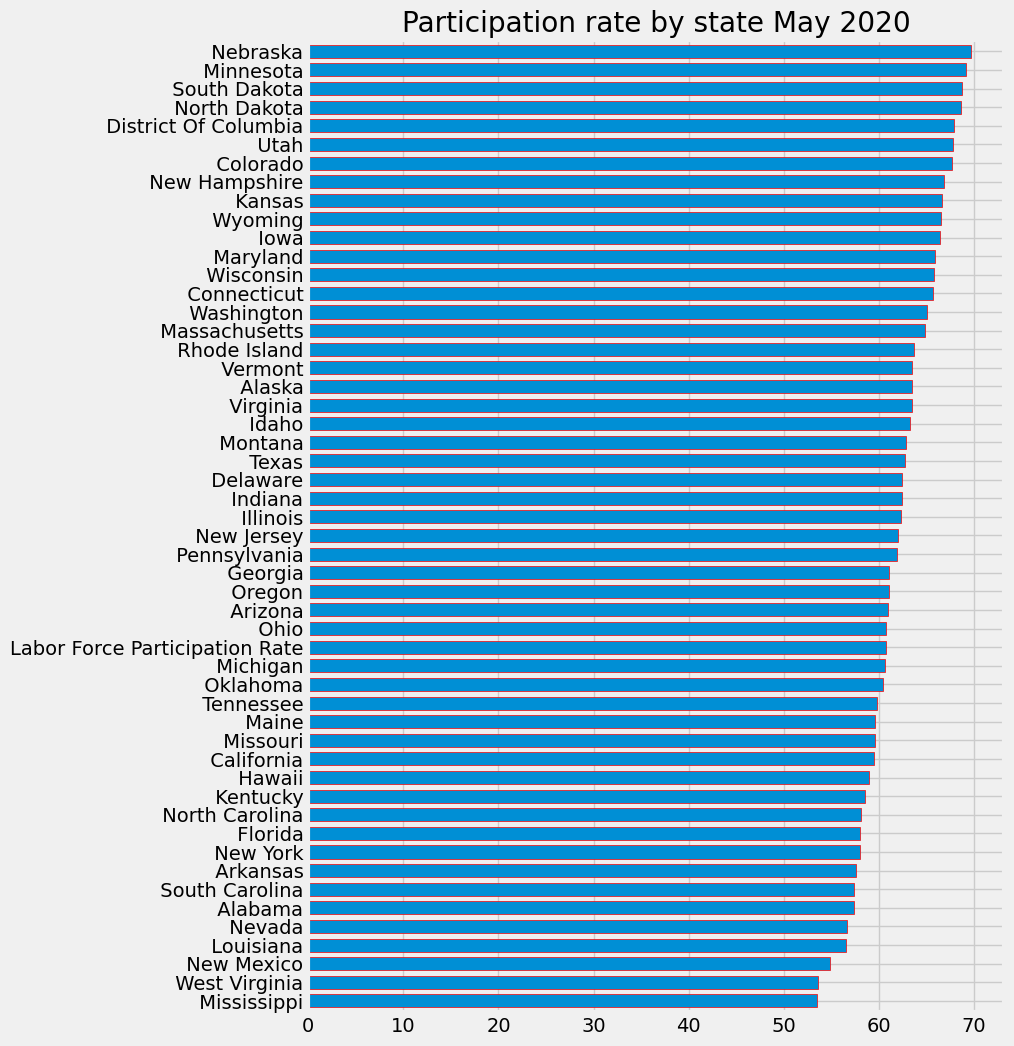

In [150]:
# Participation rate by states
part_ax = part_states.loc[part_states.index == '2020-05-01'].T  \
.sort_values('2020-05-01')  \
.plot(kind='barh',figsize=(8,12), width = 0.7, edgecolor = 'red', \
      title='Participation rate by state May 2020')
part_ax.legend().remove()
plt.show()

# Participation vs Unemployment rate

In [211]:
unemp_states.columns

Index([' California', ' Florida', ' Texas', ' New York', ' Ohio', ' Michigan',
       ' Alabama', ' Pennsylvania', ' North Carolina', ' Illinois',
       ' Minnesota', ' Massachusetts', ' Colorado', ' New Jersey', ' Virginia',
       ' Tennessee', ' Arizona', ' Washington', ' Georgia', ' Missouri',
       ' South Carolina', ' Kentucky', ' New Mexico', ' Wisconsin', ' Nevada',
       ' Oklahoma', ' Louisiana', ' Arkansas', ' Oregon', ' Utah',
       ' West Virginia', ' Indiana', ' Alaska', ' Hawaii', ' Kansas', ' Iowa',
       ' the District of Columbia', ' Connecticut', ' Mississippi',
       ' North Dakota', ' Maryland', ' Puerto Rico', ' Montana', ' Idaho',
       ' Maine', ' New Hampshire', ' South Dakota', ' Wyoming', ' Nebraska',
       ' Rhode Island', ' Delaware', ' Vermont'],
      dtype='object')

In [153]:
unemp_states

California   Florida   Texas   New York   Ohio   Michigan   
1976-01-01          9.2       9.7     5.8       10.3    8.1        9.9  \
1976-02-01          9.2       9.7     5.8       10.3    8.1        9.9   
1976-03-01          9.1       9.6     5.9       10.2    8.1        9.9   
1976-04-01          9.1       9.5     5.9       10.2    8.0        9.8   
1976-05-01          9.0       9.3     5.9       10.1    7.8        9.6   
...                 ...       ...     ...        ...    ...        ...   
2022-12-01          4.1       2.7     3.8        4.1    4.1        4.3   
2023-01-01          4.2       2.6     3.9        4.2    4.0        4.3   
2023-02-01          4.4       2.6     4.0        4.2    3.9        4.3   
2023-03-01          4.4       2.6     4.0        4.1    3.8        4.1   
2023-04-01          4.5       2.6     4.0        4.0    3.7        3.8   

             Alabama   Pennsylvania   North Carolina   Illinois  ...   
1976-01-01       6.6            8.0              6.4        6.6  ...  \
1976-02-01       6.6            8.1              6.4        6.6  ...   
1976-03-01       6.6            8.1              6.4        6.6  ...   
1976-04-01       6.5            8.1              6.3        6.6  ...   
1976-05-01       6.4            8.1              6.1        6.6  ...   
...              ...            ...              ...        ...  ...   
2022-12-01       2.6            4.3              3.8        4.6  ...   
2023-01-01       2.6            4.3              3.8        4.5  ...   
2023-02-01       2.5            4.4              3.6        4.5  ...   
2023-03-01       2.3            4.2              3.5        4.4  ...   
2023-04-01       2.2            4.1              3.4        4.2  ...   

             Montana   Idaho   Maine   New Hampshire   South Dakota   Wyoming   
1976-01-01       5.8     5.6     8.7             6.5            3.3       4.1  \
1976-02-01       5.8     5.6     8.7             6.5            3.3       4.1   
1976-03-01       5.8     5.6     8.6             6.5            3.2       4.1   
1976-04-01       5.8     5.6     8.6             6.5            3.1       4.0   
1976-05-01       5.8     5.6     8.5             6.5            3.1       3.9   
...              ...     ...     ...             ...            ...       ...   
2022-12-01       2.6     2.8     3.1             2.9            2.2       3.9   
2023-01-01       2.5     2.7     2.9             2.8            2.1       3.9   
2023-02-01       2.4     2.6     2.8             2.7            2.1       3.8   
2023-03-01       2.3     2.6     2.6             2.4            1.9       3.7   
2023-04-01       2.3     2.6     2.4             2.1            1.9       3.5   

             Nebraska   Rhode Island   Delaware   Vermont  
1976-01-01        3.3            7.8        8.0       8.6  
1976-02-01        3.3            7.8        8.0       8.6  
1976-03-01        3.3            7.7        8.0       8.6  
1976-04-01        3.2            7.7        8.1       8.6  
1976-05-01        3.1            7.7        8.3       8.5  
...               ...            ...        ...       ...  
2022-12-01        2.7            3.2        4.6       3.0  
2023-01-01        2.5            3.1        4.6       2.9  
2023-02-01        2.3            3.1        4.6       2.8  
2023-03-01        2.1            3.1        4.4       2.7  
2023-04-01        2.0            3.0        4.3       2.4  

[566 rows x 52 columns]

In [215]:
unemp_states.rename(columns={' the District of Columbia':'District of Columbia'})

California   Florida   Texas   New York   Ohio   Michigan   
1976-01-01          9.2       9.7     5.8       10.3    8.1        9.9  \
1976-02-01          9.2       9.7     5.8       10.3    8.1        9.9   
1976-03-01          9.1       9.6     5.9       10.2    8.1        9.9   
1976-04-01          9.1       9.5     5.9       10.2    8.0        9.8   
1976-05-01          9.0       9.3     5.9       10.1    7.8        9.6   
...                 ...       ...     ...        ...    ...        ...   
2022-12-01          4.1       2.7     3.8        4.1    4.1        4.3   
2023-01-01          4.2       2.6     3.9        4.2    4.0        4.3   
2023-02-01          4.4       2.6     4.0        4.2    3.9        4.3   
2023-03-01          4.4       2.6     4.0        4.1    3.8        4.1   
2023-04-01          4.5       2.6     4.0        4.0    3.7        3.8   

             Alabama   Pennsylvania   North Carolina   Illinois  ...   
1976-01-01       6.6            8.0              6.4        6.6  ...  \
1976-02-01       6.6            8.1              6.4        6.6  ...   
1976-03-01       6.6            8.1              6.4        6.6  ...   
1976-04-01       6.5            8.1              6.3        6.6  ...   
1976-05-01       6.4            8.1              6.1        6.6  ...   
...              ...            ...              ...        ...  ...   
2022-12-01       2.6            4.3              3.8        4.6  ...   
2023-01-01       2.6            4.3              3.8        4.5  ...   
2023-02-01       2.5            4.4              3.6        4.5  ...   
2023-03-01       2.3            4.2              3.5        4.4  ...   
2023-04-01       2.2            4.1              3.4        4.2  ...   

             Montana   Idaho   Maine   New Hampshire   South Dakota   Wyoming   
1976-01-01       5.8     5.6     8.7             6.5            3.3       4.1  \
1976-02-01       5.8     5.6     8.7             6.5            3.3       4.1   
1976-03-01       5.8     5.6     8.6             6.5            3.2       4.1   
1976-04-01       5.8     5.6     8.6             6.5            3.1       4.0   
1976-05-01       5.8     5.6     8.5             6.5            3.1       3.9   
...              ...     ...     ...             ...            ...       ...   
2022-12-01       2.6     2.8     3.1             2.9            2.2       3.9   
2023-01-01       2.5     2.7     2.9             2.8            2.1       3.9   
2023-02-01       2.4     2.6     2.8             2.7            2.1       3.8   
2023-03-01       2.3     2.6     2.6             2.4            1.9       3.7   
2023-04-01       2.3     2.6     2.4             2.1            1.9       3.5   

             Nebraska   Rhode Island   Delaware   Vermont  
1976-01-01        3.3            7.8        8.0       8.6  
1976-02-01        3.3            7.8        8.0       8.6  
1976-03-01        3.3            7.7        8.0       8.6  
1976-04-01        3.2            7.7        8.1       8.6  
1976-05-01        3.1            7.7        8.3       8.5  
...               ...            ...        ...       ...  
2022-12-01        2.7            3.2        4.6       3.0  
2023-01-01        2.5            3.1        4.6       2.9  
2023-02-01        2.3            3.1        4.6       2.8  
2023-03-01        2.1            3.1        4.4       2.7  
2023-04-01        2.0            3.0        4.3       2.4  

[566 rows x 52 columns]

KeyError: ' the District of Columbia'

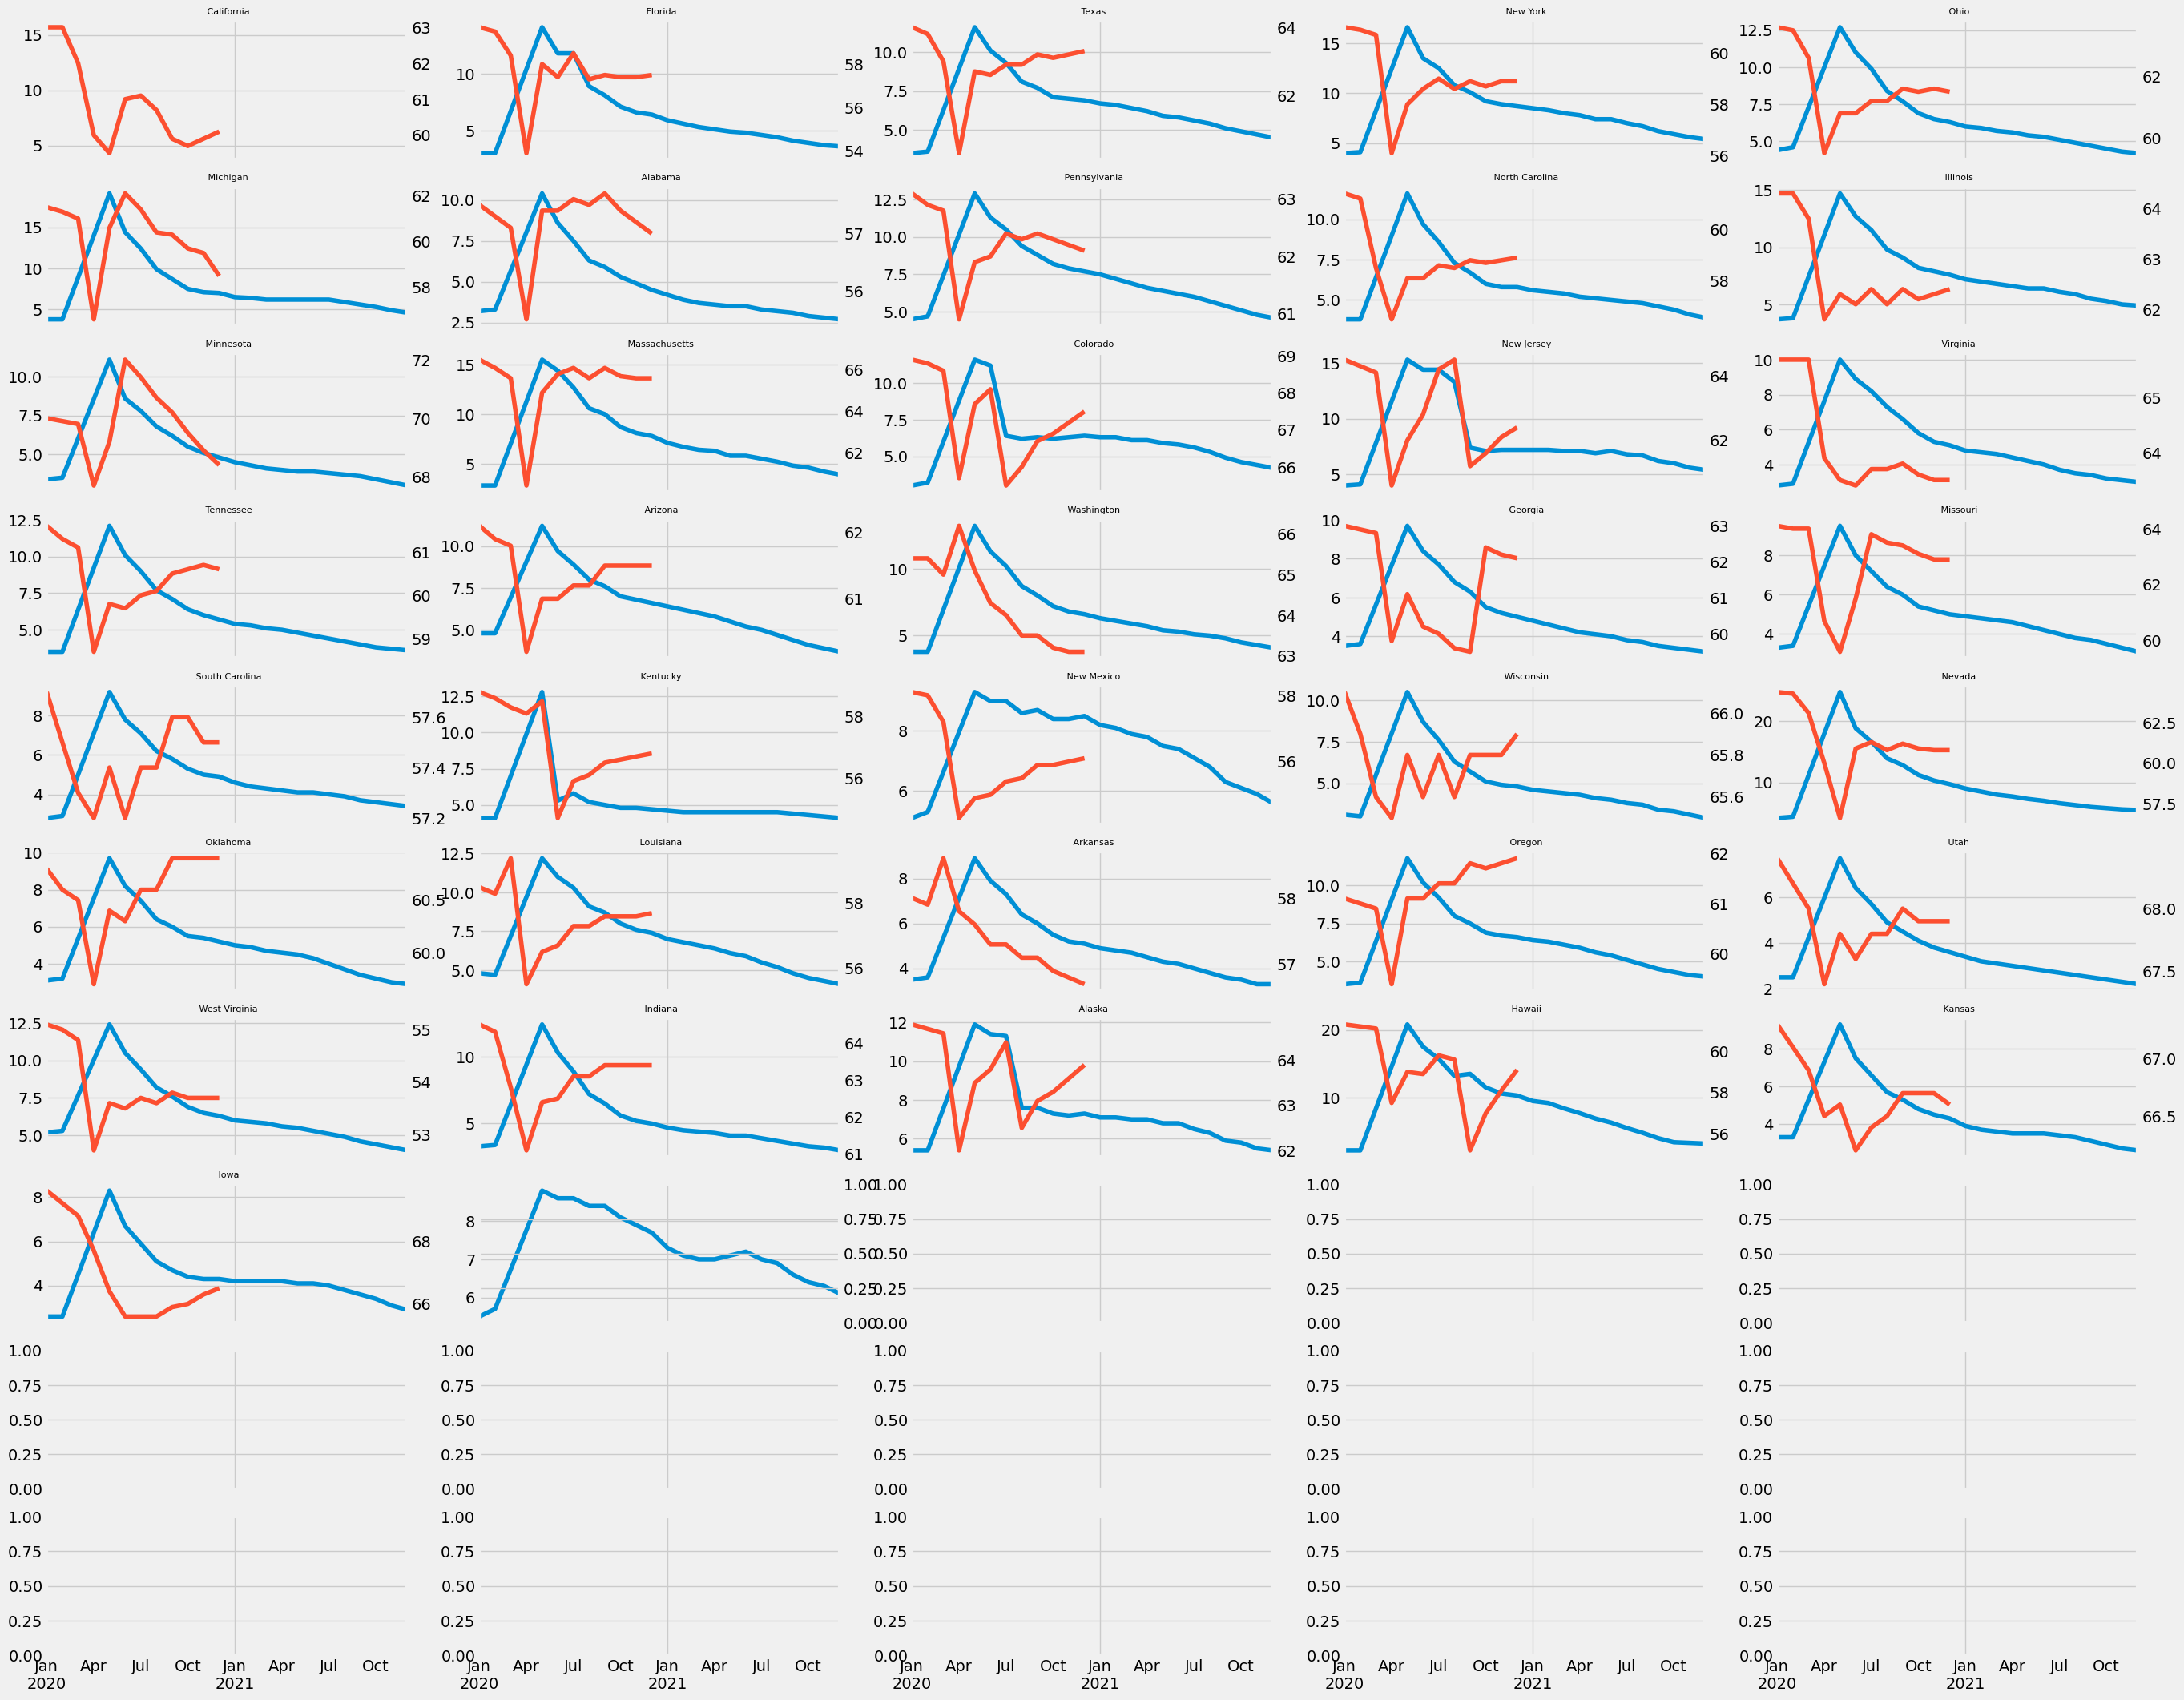

In [229]:
fig, axs = plt.subplots(10, 5, figsize=(30,30), sharex=True)
axs = axs.flatten()

i = 0
for state in unemp_states.columns:
    if state == 'District of Columbia':
        continue
    #fig, ax = plt.subplots()
    ax2 = axs[i].twinx()
    unemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2021')[state] \
        .plot(ax=ax2, label='Participation', color=
              [1])
    ax2.grid(False)
    axs[i].set_title(state, fontsize=8)
    i += 1

plt.tight_layout()
plt.show()